Multi-label image classification

https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/


You can get the dataset from https://drive.google.com/file/d/1iQV5kKF_KGZL9ALx9MMXk_Lg7PklBLCE/view

Use dl1-lab env

In [56]:
import keras

In [57]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os


In [58]:
#read csv file
csvPath = './data/multi-label-movie-genre.csv'

In [59]:
data = pd.read_csv(csvPath)

In [60]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
data.shape

(7254, 27)

In [47]:
data.describe()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,...,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000
mean,0.185139,0.119934,0.033637,0.060794,0.399779,0.162117,0.089881,0.498897,0.059829,0.064378,...,0.001379,0.002895,0.000276,0.183899,0.055004,0.006341,0.030466,0.126551,0.019851,0.006893
std,0.388437,0.324907,0.180304,0.238969,0.489887,0.368584,0.286032,0.500033,0.237186,0.245442,...,0.037106,0.053731,0.016603,0.387428,0.228004,0.079385,0.171877,0.332492,0.139498,0.082742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
Id             7254 non-null object
Genre          7254 non-null object
Action         7254 non-null int64
Adventure      7254 non-null int64
Animation      7254 non-null int64
Biography      7254 non-null int64
Comedy         7254 non-null int64
Crime          7254 non-null int64
Documentary    7254 non-null int64
Drama          7254 non-null int64
Family         7254 non-null int64
Fantasy        7254 non-null int64
History        7254 non-null int64
Horror         7254 non-null int64
Music          7254 non-null int64
Musical        7254 non-null int64
Mystery        7254 non-null int64
N/A            7254 non-null int64
News           7254 non-null int64
Reality-TV     7254 non-null int64
Romance        7254 non-null int64
Sci-Fi         7254 non-null int64
Short          7254 non-null int64
Sport          7254 non-null int64
Thriller       7254 non-null int64
War            7

In [49]:
data.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [54]:
curDir = os.path.abspath('.')
imagePath = os.path.sep.join([curDir, 'data/multi-label-images/'])
print(imagePath)

/Users/dexterdsilva/Documents/Developer/MachineLearning/analytics-vidhya/multi-label-image-class/data/multi-label-images/


In [ ]:
data_image=[]
for i in tqdm(range(data.shape[0])):
    img=image.load_img(imagePath + data['Id'][i]+'.jpg', target_size=(400,400,3))
    img=image.img_to_array(img)
    img=img/255.
    data_image.append(img)
    
X=np.array(data_image)    

In [ ]:
print(X.shape)

Text(2, 2, "['Comedy']")

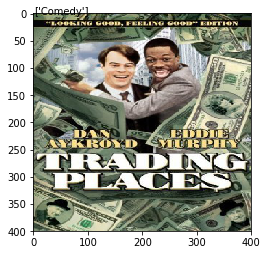

In [14]:
#show 1 image
plt.imshow(X[2])
plt.text(2,2,data['Genre'][2])

In [15]:
#get target labels array and drop Id and Genre
y=np.array(data.drop(['Id','Genre'],axis=1))
print(y.shape)
print('example - comedy is 5th column -  ',y[2])

(7254, 25)
example - comedy is 5th column -   [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.2)

In [24]:
#with open('X_train.csv',  'w') as FOUT:
#    np.savetxt(FOUT, X_train, delimiter=',')  #only for 2 rd csv file

#for 4d use
np.save('X_train_split.dat', X_train)
#which can then be loaded using np.load;
#loaded_array = np.load('file_name.npy')


In [25]:
np.save('X_test_split.dat', X_test)
np.save('y_train_split.dat', y_train)
np.save('y_test_split.dat', y_test)

In [26]:
#Build model
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5), activation='relu',input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu' ))
model.add(Dropout(0.5))
model.add(Dense(25,activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save('initial_model.h5')

In [29]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)
#TRAIN THIS ON COLAB AND THEN USE TRAINED MODEL TO PREDICT AS WE DID WITH PYIMAGE VIDEO-CLASS
#use model = keras.models.load_model('path_to_my_model.h5')
model.save('trained_model_5epochs.h5')

Train on 5803 samples, validate on 1451 samples
Epoch 1/5
5803/5803 [==============================] - 2458s 424ms/step - loss: 0.4212 - acc: 0.8197 - val_loss: 0.2890 - val_acc: 0.9052
Epoch 2/5
5803/5803 [==============================] - 2135s 368ms/step - loss: 0.2890 - acc: 0.8987 - val_loss: 0.2738 - val_acc: 0.9054
Epoch 3/5
5803/5803 [==============================] - 2122s 366ms/step - loss: 0.2698 - acc: 0.9045 - val_loss: 0.2494 - val_acc: 0.9054
Epoch 4/5
5803/5803 [==============================] - 1984s 342ms/step - loss: 0.2631 - acc: 0.9066 - val_loss: 0.2437 - val_acc: 0.9040
Epoch 5/5
5803/5803 [==============================] - 1968s 339ms/step - loss: 0.2580 - acc: 0.9074 - val_loss: 0.2519 - val_acc: 0.9060


# load colab trained model and predict

In [4]:
loaded_model = load_model('./trained_model_50epochs.h5')

In [5]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 296, 296, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 148, 148, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 68, 68, 64)        51264     
__________

In [6]:
!pwd

/Users/dexterdsilva/Documents/Developer/MachineLearning/analytics-vidhya/multi-label-image-class


In [13]:
#use GOT image - preprocess images using same methodology
#use 300,300 resize because we used that in the colab model
img = image.load_img('./GOT.jpg', target_size=(300,300))
img = image.img_to_array(img)
img=img/255

Now, we will predict the genre for these posters using our trained model. The model will tell us the probability for each genre and we will take the top 3 predictions from that.

In [14]:
#for classes should've used a pickle file as in pyimage
#luckily we have the classes in a csv file 
train=pd.read_csv('./data/multi-label-movie-genre.csv')

In [15]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
classes = np.array(train.columns[2:])

In [36]:
#note used 300,300,3 image size in colab
proba = loaded_model.predict(img.reshape(1,300,300,3))
top_3 =np.argsort(proba[0][:-4:-1])

In [33]:
print(top_3)

[0 1 2]


In [34]:
for i in range(3):
    print('{}'.format(classes[top_3[i]])+' ({:.3})'.format(proba[0][top_3[i]]))

Action (0.202)
Adventure (0.0746)
Animation (0.000644)


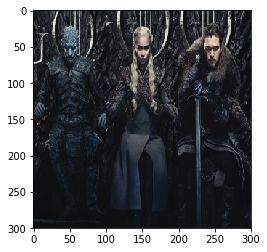

In [19]:
plt.imshow(img)

In [37]:
#try on avengers
img = image.load_img('./avengers.jpeg',target_size=(300,300))
img=image.img_to_array(img)
img=img/255

In [38]:
proba = loaded_model.predict(img.reshape(1,300,300,3))
top_3=np.argsort(proba[0][:-4:-1])

Adventure (0.512)
Action (0.433)
Animation (0.187)


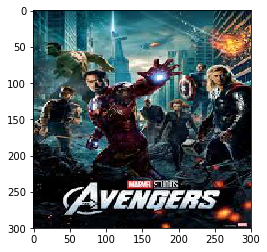

In [39]:
for i in range(3):
    print('{}'.format(classes[top_3[i]])+' ({:.3})'.format(proba[0][top_3[i]]))
    
plt.imshow(img)
plt.show()

In [40]:
print(classes[3])

Biography
